In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from  sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [76]:
data= pd.read_csv("Real_Estate.csv")
data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [78]:
data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [79]:
data["Transaction date"]=pd.to_datetime(data["Transaction date"])

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Transaction date                     414 non-null    datetime64[ns]
 1   House age                            414 non-null    float64       
 2   Distance to the nearest MRT station  414 non-null    float64       
 3   Number of convenience stores         414 non-null    int64         
 4   Latitude                             414 non-null    float64       
 5   Longitude                            414 non-null    float64       
 6   House price of unit area             414 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.8 KB


In [96]:
data["Year"]=data["Transaction date"].dt.year
data["Month"]=data["Transaction date"].dt.month

In [95]:
data["Year"]

0      2012
1      2012
2      2012
3      2012
4      2012
       ... 
409    2013
410    2013
411    2013
412    2013
413    2013
Name: Year, Length: 414, dtype: int64

<Figure size 1000x800 with 0 Axes>

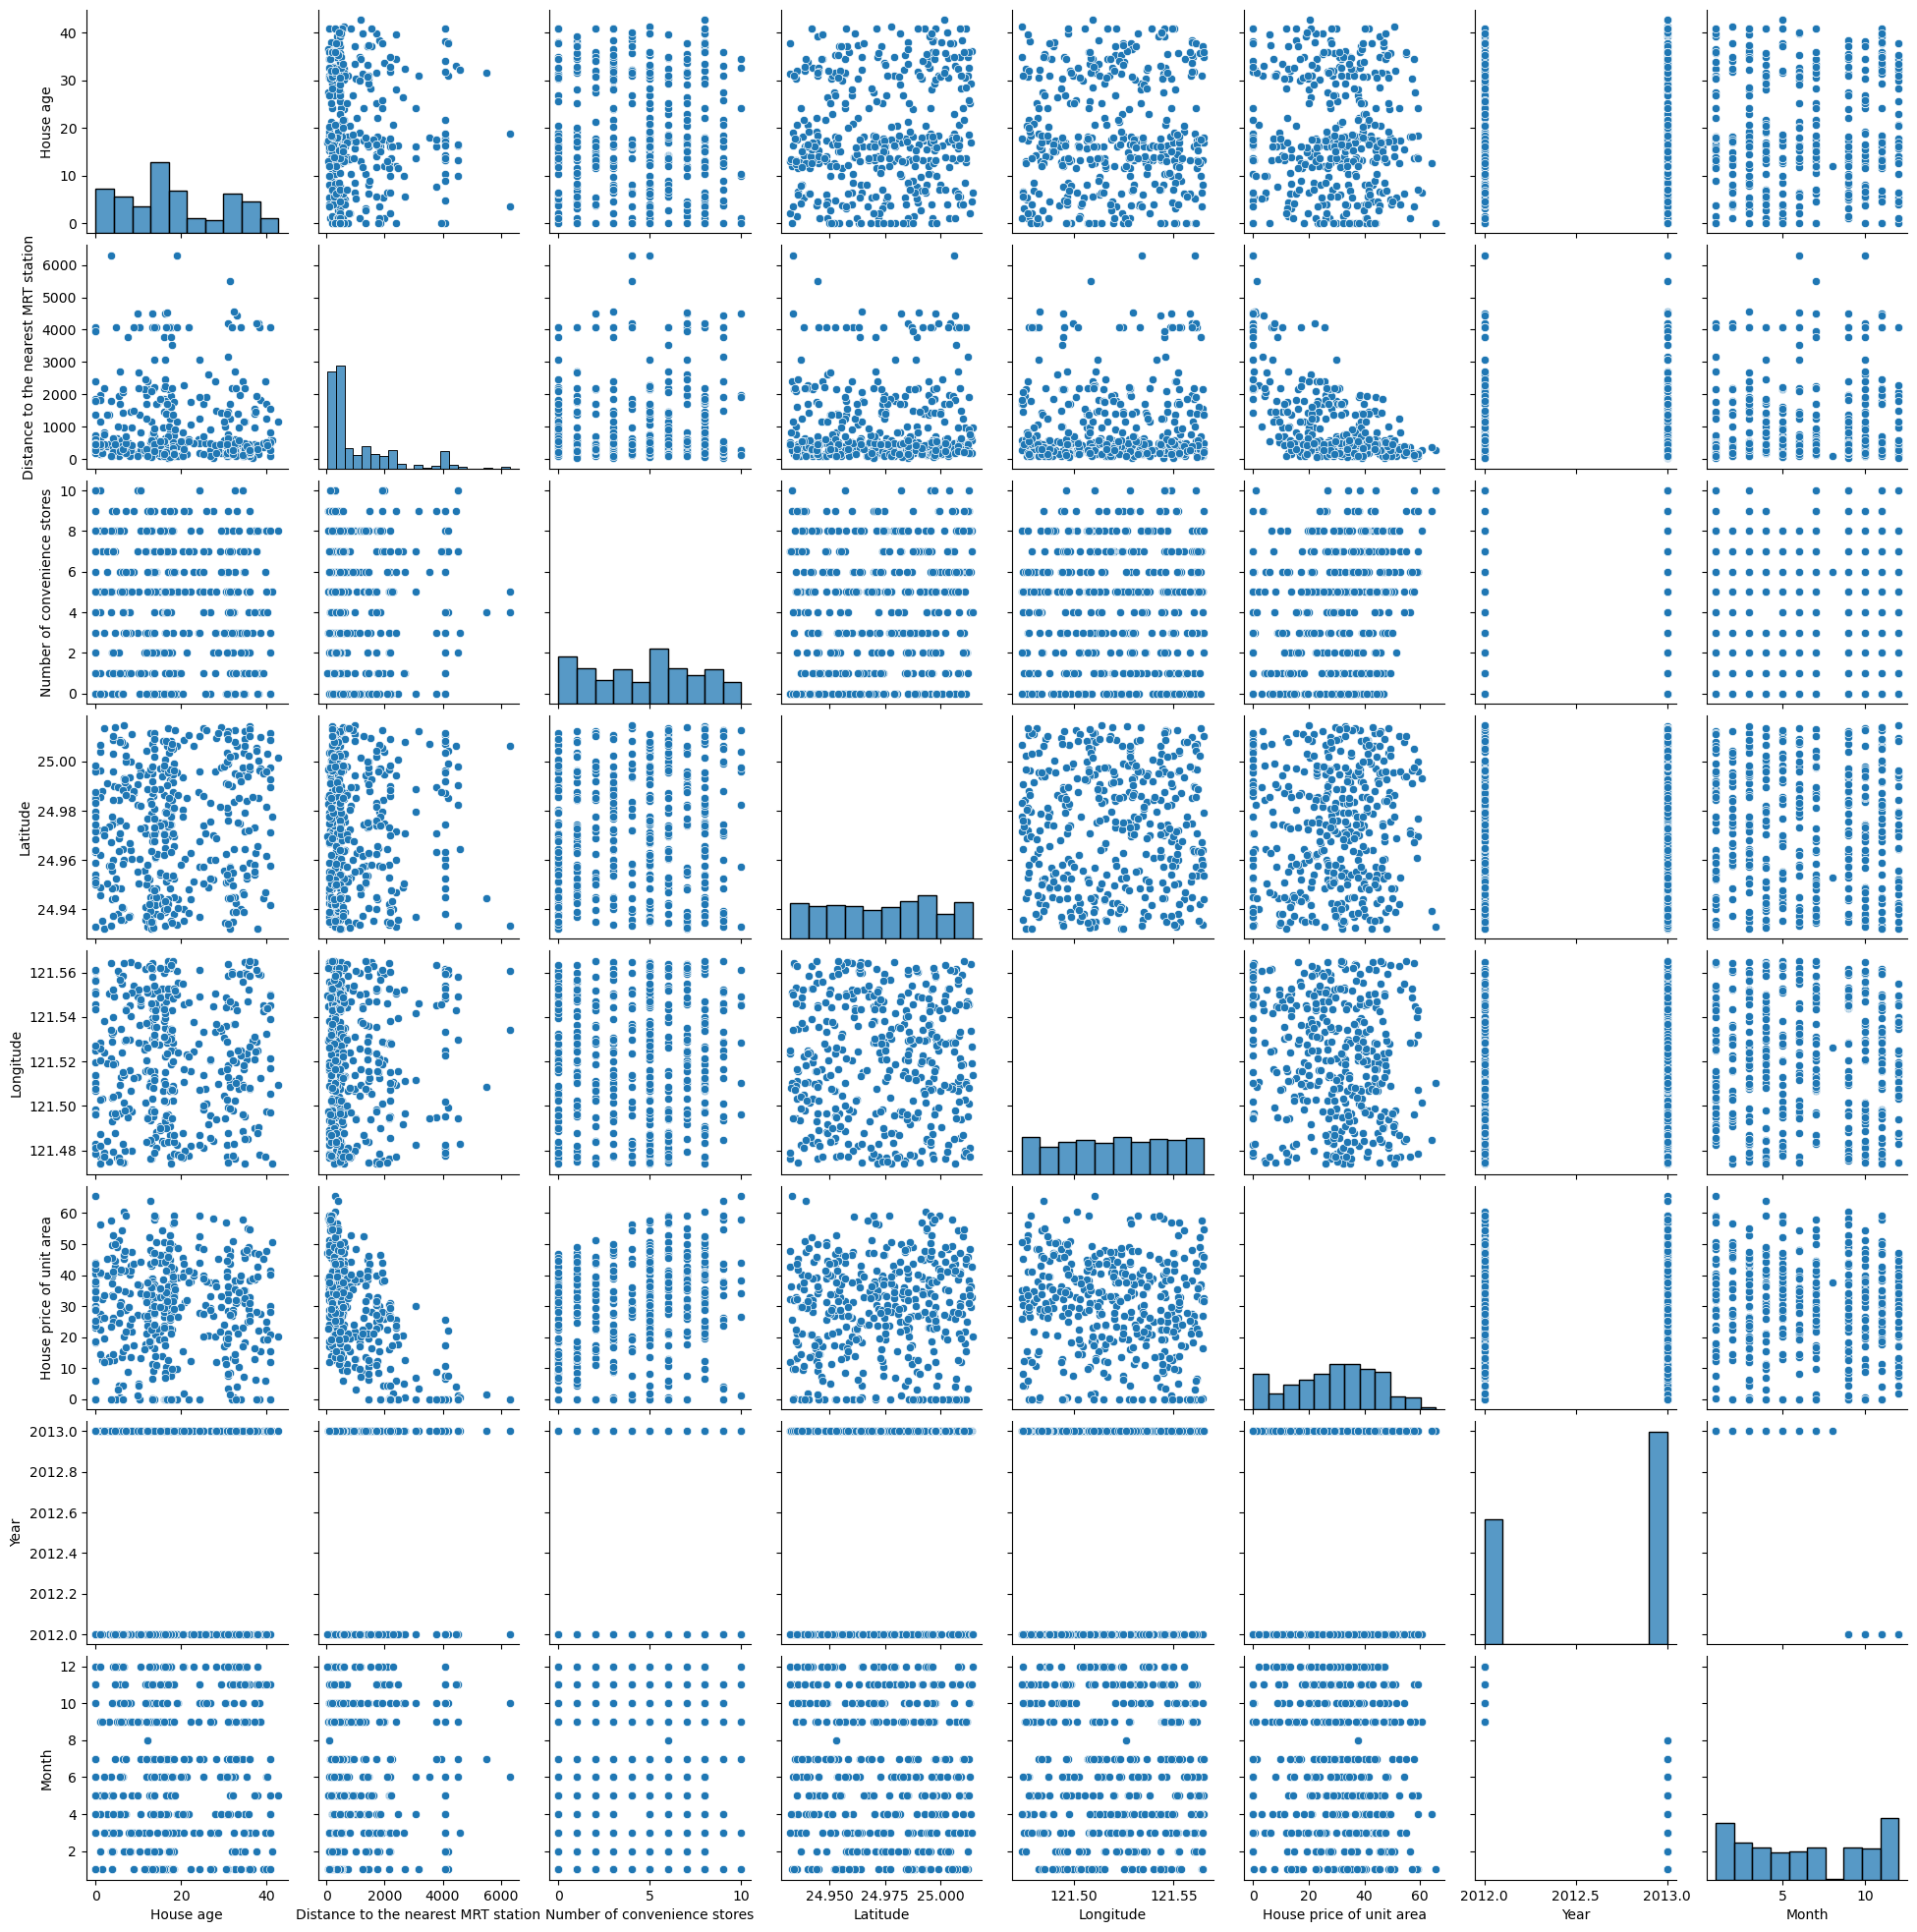

In [83]:
plt.figure(figsize=(10,8))
sns.pairplot(data)


array([[<Axes: title={'center': 'Transaction date'}>,
        <Axes: title={'center': 'House age'}>,
        <Axes: title={'center': 'Distance to the nearest MRT station'}>],
       [<Axes: title={'center': 'Number of convenience stores'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'House price of unit area'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

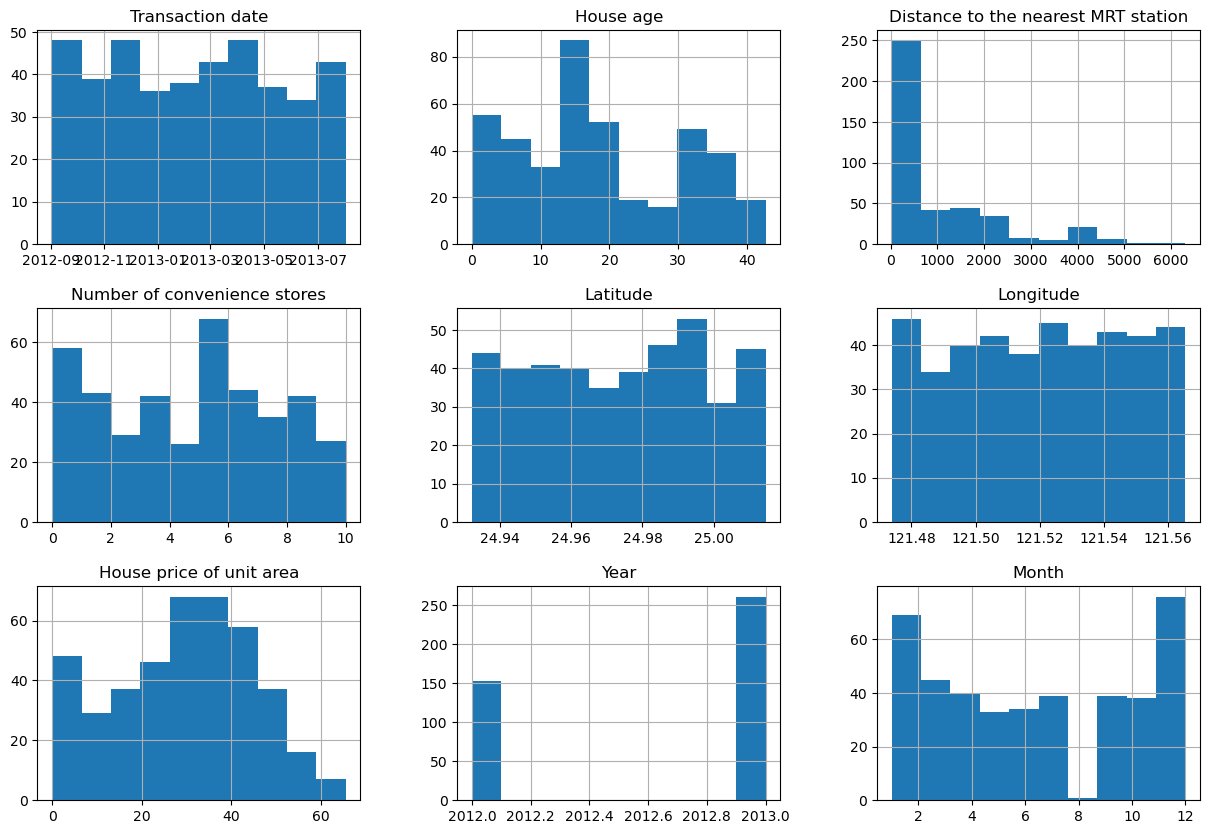

In [84]:
data.hist(figsize=(15,10))

In [85]:
data.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8832\2627137660.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Year,Month
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284,-0.025535,0.018921
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579,-0.017002,0.027954
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763,-0.096270,0.081461
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008,0.024791,-0.050891
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626,0.086737,-0.057595
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000,0.015745,-0.041256
Year,-0.025535,-0.017002,-0.096270,0.024791,0.086737,0.015745,1.000000,-0.873938
Month,0.018921,0.027954,0.081461,-0.050891,-0.057595,-0.041256,-0.873938,1.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_8832\995012006.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

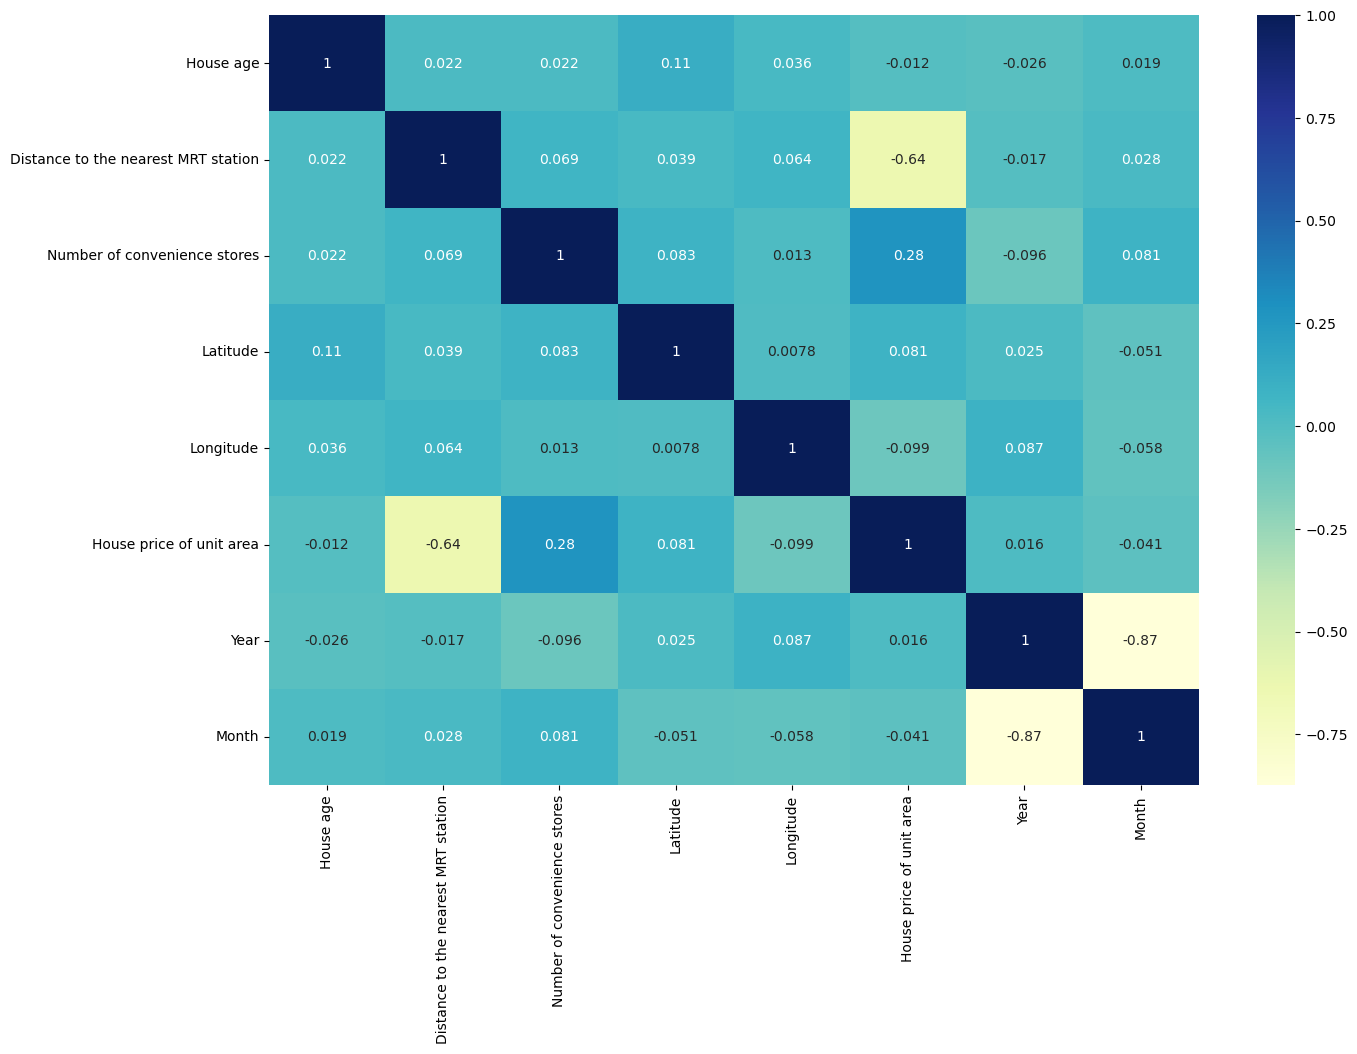

In [101]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [87]:
data.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Year', 'Month'],
      dtype='object')

In [88]:
data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Year,Month
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673,2012,9
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725,2012,9
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267,2012,9
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638,2012,9
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710,2012,9
...,...,...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310,2013,7
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347,2013,7
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105,2013,7
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620,2013,7


In [89]:
data.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Year', 'Month'],
      dtype='object')

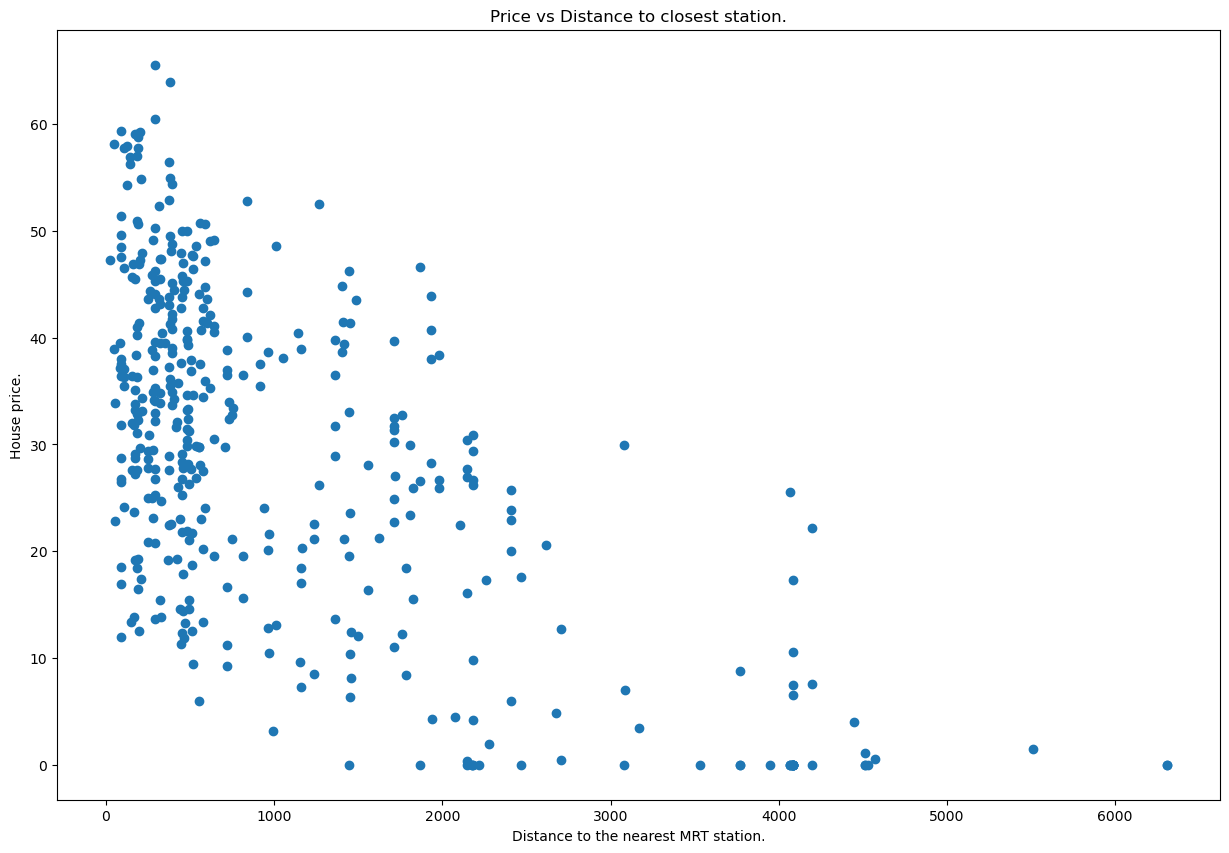

In [90]:
plt.figure(figsize=(15,10))
plt.scatter(data["Distance to the nearest MRT station"],data["House price of unit area"])
plt.xlabel("Distance to the nearest MRT station.")
plt.ylabel("House price.")
plt.title("Price vs Distance to closest station.")

plt.savefig("Price vs Distance to MRT station.")

plt.show()

# House prices are higher when the distance to the closest MRT station is short.

In [91]:
data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Year,Month
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673,2012,9
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725,2012,9
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267,2012,9
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638,2012,9
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710,2012,9
...,...,...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310,2013,7
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347,2013,7
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105,2013,7
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620,2013,7


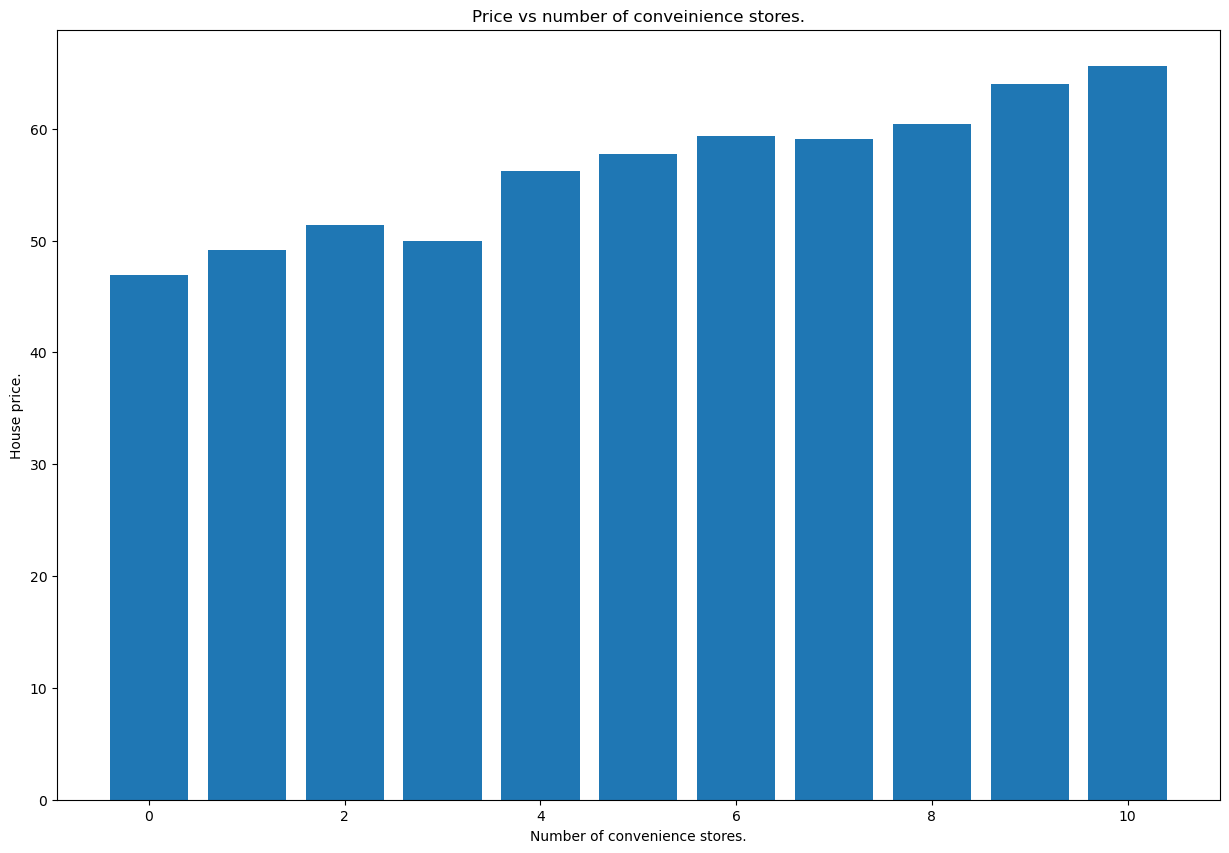

In [92]:
plt.figure(figsize=(15,10))
plt.bar(data["Number of convenience stores"],data["House price of unit area"])
plt.xlabel("Number of convenience stores.")
plt.ylabel("House price.")
plt.title("Price vs number of conveinience stores.")

plt.savefig("Price vs convenience stores.")

plt.show()

# Prices are higher when there are more convenience store within an area.

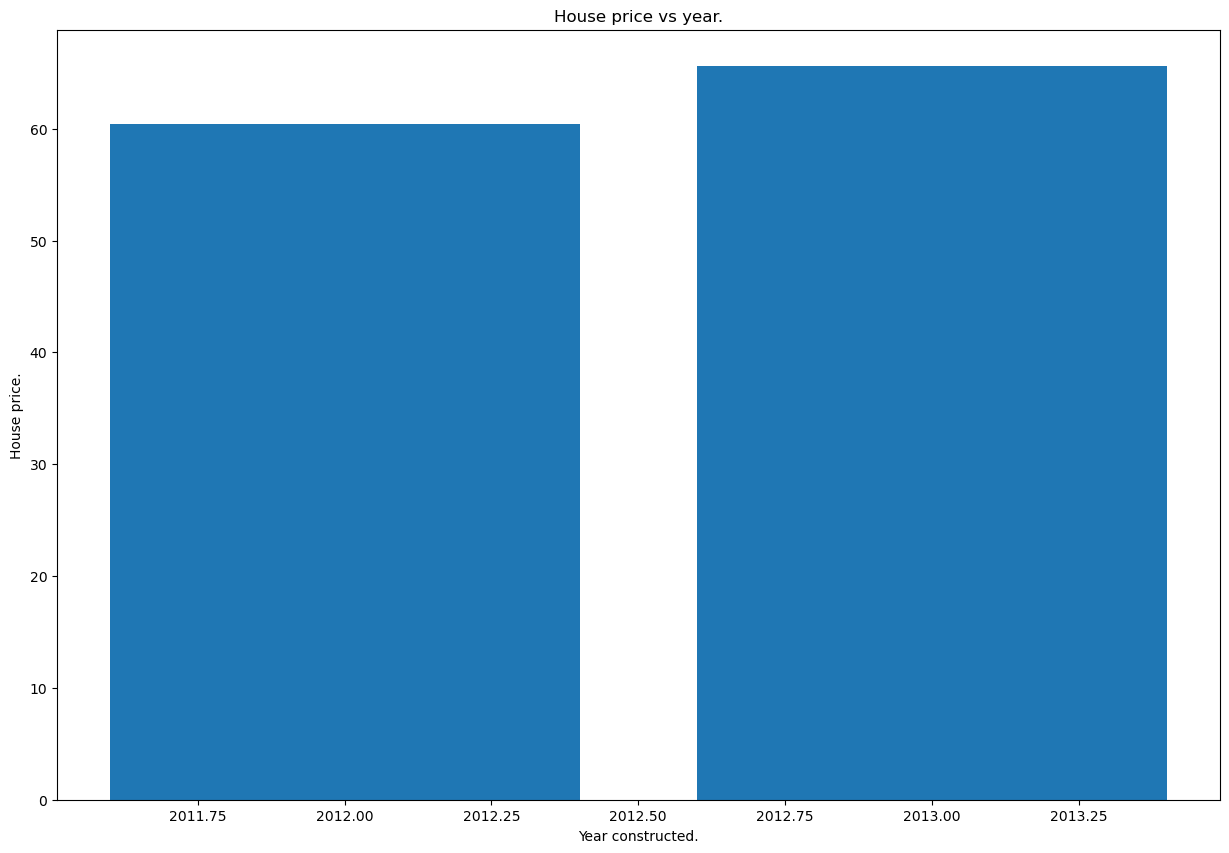

In [99]:
plt.figure(figsize=(15,10))
plt.bar(data["Year"],data["House price of unit area"])
plt.xlabel("Year constructed.")
plt.ylabel("House price.")
plt.title("House price vs year.")
plt.savefig("Price vs year constructed.")

plt.show()

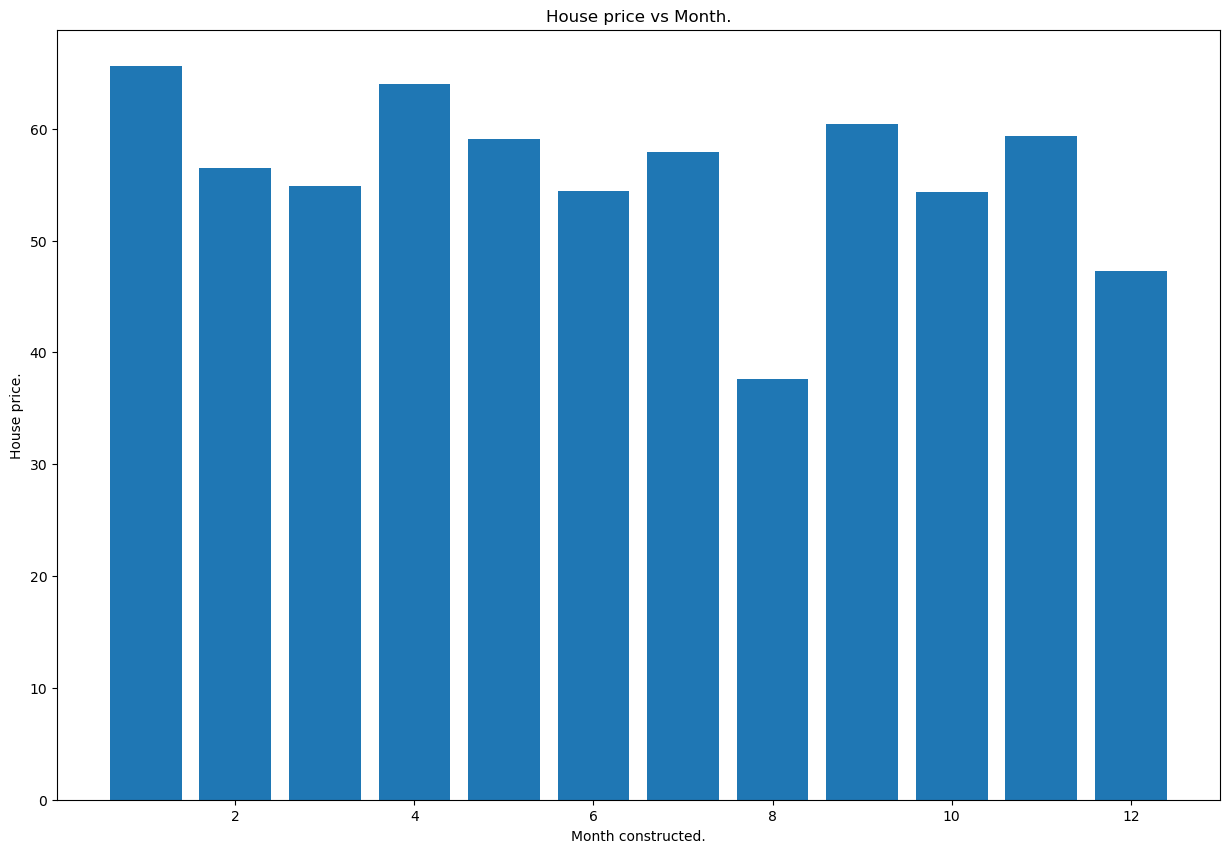

In [100]:
plt.figure(figsize=(15,10))
plt.bar(data["Month"],data["House price of unit area"])
plt.xlabel("Month constructed.")
plt.ylabel("House price.")
plt.title("House price vs Month.")
plt.savefig("Price vs month constructed")

plt.show()

In [103]:
data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Year,Month
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673,2012,9
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725,2012,9
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267,2012,9
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638,2012,9
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710,2012,9
...,...,...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310,2013,7
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347,2013,7
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105,2013,7
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620,2013,7


In [110]:
x=data.drop(["House price of unit area","Transaction date"],axis=1)
y=data["House price of unit area"]

MSE: 130.12835556915883


Text(0.5, 1.0, 'LR predictions.')

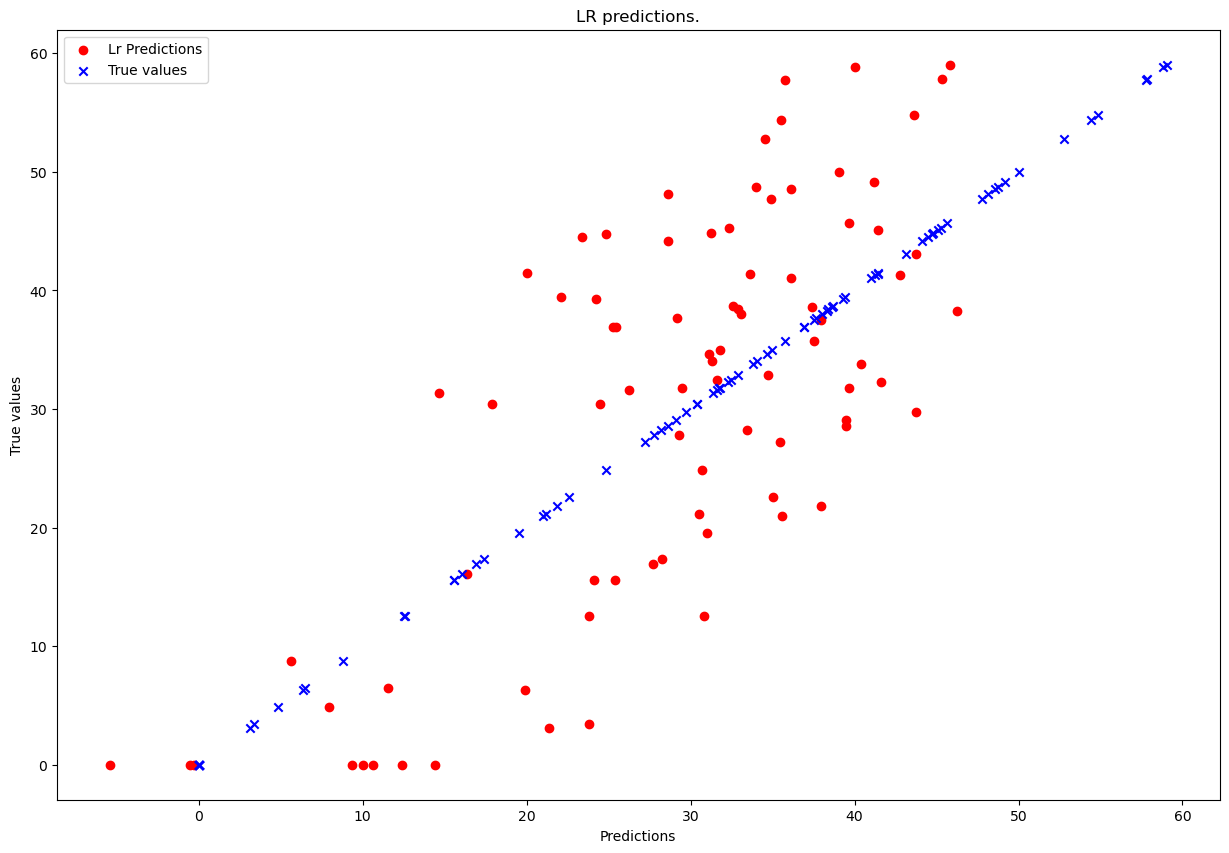

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

lr=LinearRegression()

lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

mse=mean_squared_error(y_pred,y_test)
print("MSE:",mse)

plt.figure(figsize=(15,10))
plt.scatter(y_pred,y_test,color="red",marker="o",label="Lr Predictions")
plt.scatter(y_test,y_test,color="blue",marker="x",label="True values")
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.legend()
plt.savefig("LR model.")
plt.title("LR predictions.")

MSE: 130.12835556915883


Text(0.5, 1.0, 'Dtree predictions.')

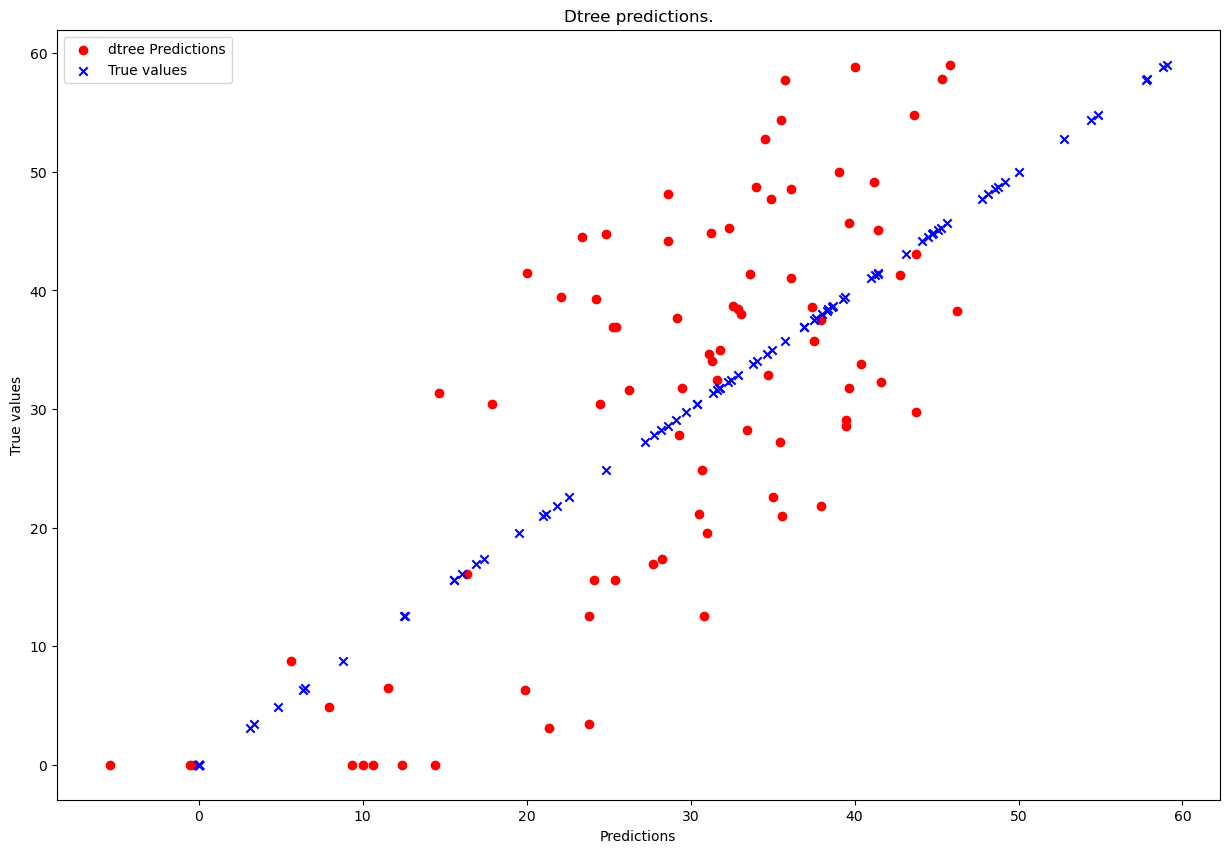

In [126]:
dtree=DecisionTreeRegressor(max_depth=None,min_samples_split=5,min_samples_leaf=5,random_state=42)

dtree.fit(x_train,y_train)
dtree.predict(x_test)

mse=mean_squared_error(y_pred,y_test)
print("MSE:",mse)


plt.figure(figsize=(15,10))
plt.scatter(y_pred,y_test,color="red",marker="o",label="dtree Predictions")
plt.scatter(y_test,y_test,color="blue",marker="x",label="True values")
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.legend()
plt.savefig("Dtree model.")
plt.title("Dtree predictions.")

MSE: 130.12835556915883


Text(0.5, 1.0, 'rforest predictions.')

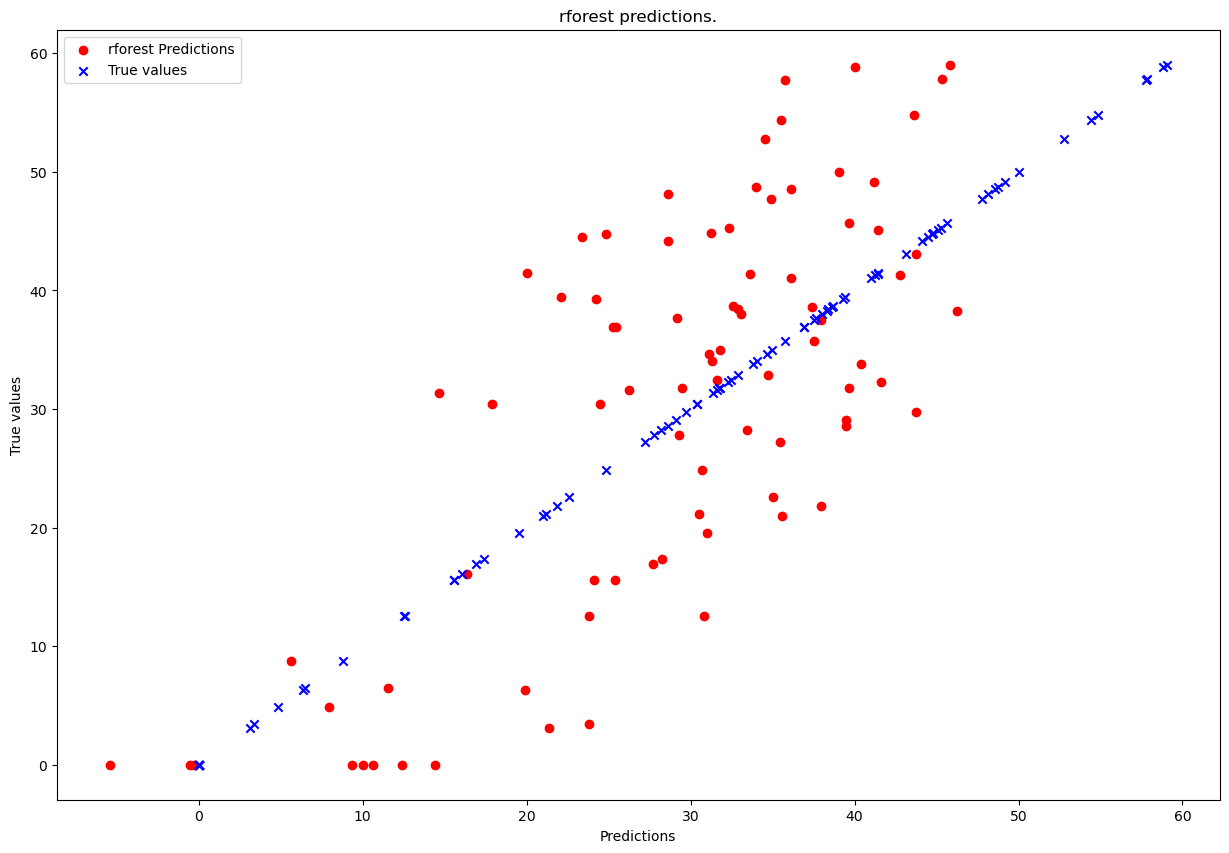

In [127]:
rforest=RandomForestRegressor(n_estimators=20,max_depth=10,min_samples_leaf=10,min_samples_split=5,random_state=42)

rforest.fit(x_train,y_train)
rforest.predict(x_test)

mse=mean_squared_error(y_pred,y_test)

print("MSE:",mse)
plt.figure(figsize=(15,10))
plt.scatter(y_pred,y_test,color="red",marker="o",label="rforest Predictions")
plt.scatter(y_test,y_test,color="blue",marker="x",label="True values")
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.legend()
plt.savefig("rforest model.")
plt.title("rforest predictions.")

In [130]:
param_dist={
    "n_estimators":[10,20,30,50],
    "max_depth":[None,5,10,15],
    "min_samples_leaf":[2,3,6,7],
    "min_samples_split":[2,3,6,8]

}

estimator=RandomForestRegressor(random_state=42)

grid_cv=GridSearchCV(estimator=estimator,param_grid=param_dist,cv=5,scoring="neg_mean_squared_error")

grid_cv.fit(x_train,y_train)

best_params=grid_cv.best_params_
best_estimator=grid_cv.best_estimator_

In [131]:
best_params

{'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 30}

In [132]:
best_estimator

RandomForestRegressor(max_depth=5, min_samples_leaf=7, n_estimators=30,
                      random_state=42)

MSE: 130.12835556915883


Text(0.5, 1.0, 'rforest predictions.')

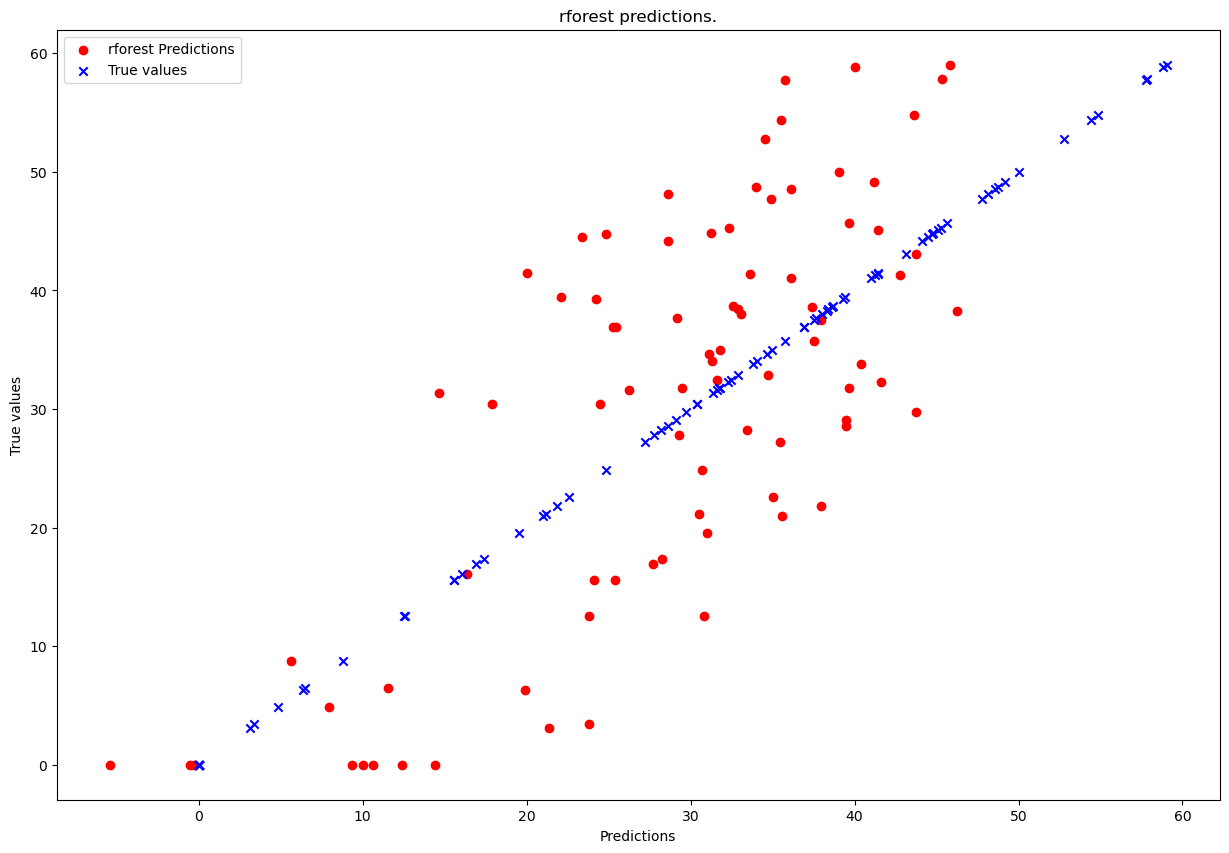

In [142]:
rforest=RandomForestRegressor(max_depth=5,min_samples_leaf=7,min_samples_split=2,n_estimators=30,random_state=42)

rforest.fit(x_train,y_train)
rforest.predict(x_test)

mse=mean_squared_error(y_pred,y_test)
print("MSE:",mse)
plt.figure(figsize=(15,10))
plt.scatter(y_pred,y_test,color="red",marker="o",label="rforest Predictions")
plt.scatter(y_test,y_test,color="blue",marker="x",label="True values")
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.legend()
plt.savefig("rforest model.")
plt.title("rforest predictions.")

Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set.

Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.